# Test of `colibri.cosmology`

In [1]:
import colibri.cosmology as cc
import matplotlib.pyplot as plt
import numpy as np

plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 20)

### Define a ``cosmo`` instance from `colibri.cosmology`

In [2]:
C = cc.cosmo(Omega_m = 0.3089,       # total matter (CDM + baryons + neutrinos) density parameter today
             Omega_b = 0.0486,       # baryon density parameter today
             Omega_K = 0.,           # Curvature density parameter (Omega_lambda will be set as 1-Omega_K-Omega_m-Omega_b-Omega_gamma
             ns      = 0.9667,       # Scalar spectral index of primordial perturbation
             As      = 2.14e-9,      # Scalar amplitude of primordial perturbation
             sigma_8 = None,         # Power spectrum normalization (set to None as As is defined)
             h       = 0.6774,       # Hubble parameter in units of 100 km/s/Mpc
             w0      = -1.,          # Dark energy parameter of state today
             wa      = 0.,           # Evolution of dark energy parameter of state
             tau     = 0.06,         # Optical depth to reionization
             T_cmb   = 2.7255,       # CMB temperature today (fixes Omega_gamma)
             M_nu    = [0.05, 0.01], # Neutrino masses in eV: in this case we have 2 massive neutrinos
             N_nu    = 3,            # Total number of neutrino species
             N_eff   = 3.046)        # Effective number of neutrinos: since 2 are massive, only 1.046 will be massless

Print all the cosmological and derived parameters

In [3]:
print("Omega matter:         %.4f" %(C.Omega_m))
print("Omega CDM:            %.4f" %(C.Omega_cdm))
print("Omega baryons:        %.4f" %(C.Omega_b))
print("Omega curvature:      %.4f" %(C.Omega_K))
print("Omega Lambda:         %.4f" %(C.Omega_lambda))
print("Omega photons:        %.3e" %(C.Omega_gamma))
print("Neutrino masses (eV):", C.M_nu)
print("Omega neutrino:      ", C.Omega_nu)
print("Total omega neutrino: %.3e" %(np.sum(C.Omega_nu)))
print("Massive neutrinos:    %i"   %(C.massive_nu))
print("Massless neutrinos:   %.3f" %(C.massless_nu))
print("Total neutrinos:      %i"   %(C.N_nu))
print("Effective neutrinos:  %.3f" %(C.N_eff))
print("Primordial amplitude: %.3e" %(C.As))
print("Spectral index:       %.4f" %(C.ns))

Omega matter:         0.3089
Omega CDM:            0.2589
Omega baryons:        0.0486
Omega curvature:      0.0000
Omega Lambda:         0.6910
Omega photons:        5.385e-05
Neutrino masses (eV): [0.05 0.01 0.  ]
Omega neutrino:       [1.17136282e-03 2.34683326e-04 1.24179130e-05]
Total omega neutrino: 1.418e-03
Massive neutrinos:    2
Massless neutrinos:   1.046
Total neutrinos:      3
Effective neutrinos:  3.046
Primordial amplitude: 2.140e-09
Spectral index:       0.9667


### Compute useful quantities like distances and density parameters

Define an array of scale factors and redshifts

In [4]:
aa = np.logspace(-7., 1., 101)  # Scale factor
zz = C.redshift(aa)             # Corresponding redshifts

Density parameters

In [5]:
onz0 = C.Omega_nu_z(zz)      # 3 values! One per neutrino
ocz0 = C.Omega_cdm_z(zz)     # CDM
obz0 = C.Omega_b_z(zz)       # Baryons
olz0 = C.Omega_lambda_z(zz)  # Cosmological constant/Dark energy
ogz0 = C.Omega_gamma_z(zz)   # Photons
okz0 = C.Omega_K_z(zz)       # Curvature

# Total (should sum to 1)
otz0 = np.sum(onz0, axis=0)+olz0+ocz0+obz0+ogz0+okz0

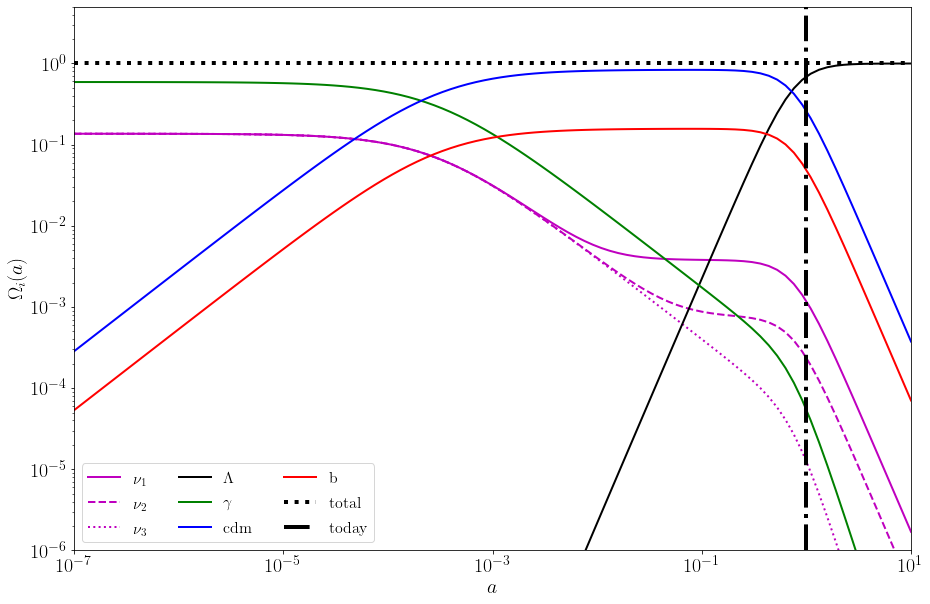

In [6]:
plt.figure(figsize=(15,10))
LS = ['-','--',':']
for i in range(len(np.atleast_1d(onz0))):
    plt.semilogx(aa, onz0[i],'m', ls = LS[i], lw = 2.0, label ='$\\nu_%i$' %(i+1))
plt.semilogx(aa, olz0,    'k',   lw = 2.0, label ='$\Lambda$')
plt.semilogx(aa, ogz0,    'g',   lw = 2.0, label = '$\\gamma$')
plt.semilogx(aa, ocz0,    'b',   lw = 2.0, label = 'cdm')
plt.semilogx(aa, obz0,    'r',   lw = 2.0, label = 'b')
plt.semilogx(aa, otz0,    'k:',  lw = 4.0, label = 'total')
plt.axvline(1., c = 'k', ls = '-.', lw = 4.0, label = 'today')
plt.yscale('log')
plt.xlabel('$a$')
plt.ylabel('$\Omega_i(a)$')
plt.xlim(aa.min(), aa.max())
plt.ylim(1e-6, 5.)
plt.legend(loc = 'lower left', ncol = 3, fontsize = 16)
plt.show()

Compute distances and Hubble parameters

In [7]:
# Distances and Hubble parameter as function of redshift
# massive_nu_approx = True is a flag that approximate neutrinos as matter
# (it is faster, but less accurate; anyway the error is much smaller than 0.1% at z < 10.
zzz   = np.linspace(0., 10., 101)
d_com = C.comoving_distance(zzz, massive_nu_approx = True)
d_ang = C.angular_diameter_distance(zzz, massive_nu_approx = True)
d_lum = C.luminosity_distance(zzz, massive_nu_approx = True)
d_vol = C.isotropic_volume_distance(zzz, massive_nu_approx = True)
H_z   = C.H(zzz)

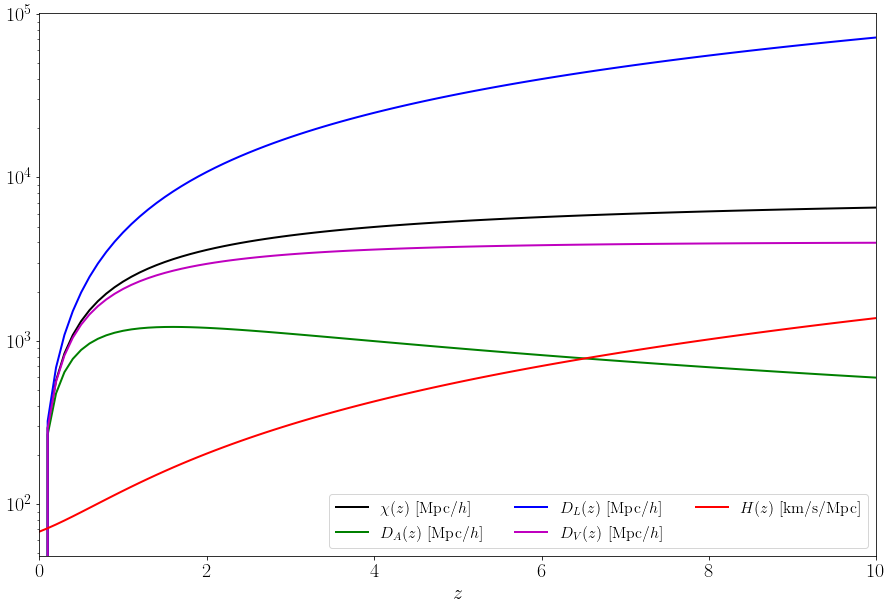

In [8]:
plt.figure(figsize=(15,10))
plt.semilogy(zzz, d_com, 'k', lw = 2.0, label = '$\chi(z) \ [\mathrm{Mpc}/h]$')
plt.semilogy(zzz, d_ang, 'g', lw = 2.0, label = '$D_A(z) \ [\mathrm{Mpc}/h]$')
plt.semilogy(zzz, d_lum, 'b', lw = 2.0, label = '$D_L(z) \ [\mathrm{Mpc}/h]$')
plt.semilogy(zzz, d_vol, 'm', lw = 2.0, label = '$D_V(z) \ [\mathrm{Mpc}/h]$')
plt.semilogy(zzz, H_z,   'r', lw = 2.0, label = '$H(z) \ [\mathrm{km/s/Mpc}]$')
plt.yscale('log')
plt.xlabel('$z$')
plt.xlim(zzz.min(), zzz.max())
plt.legend(loc = 'lower right', ncol = 3, fontsize = 16)

# Show!
plt.show()

### CMB power spectrum

In [9]:
l, Cl = C.class_Cl(l_max = 3000,
                   do_tensors = True,
                   lensing = True)
ClTT   = Cl['TT']
ClTE   = Cl['TE']
ClEE   = Cl['EE']
ClBB   = Cl['BB']
ClTT_l = Cl['TT-lensed']
ClTE_l = Cl['TE-lensed']
ClEE_l = Cl['EE-lensed']
ClBB_l = Cl['BB-lensed']

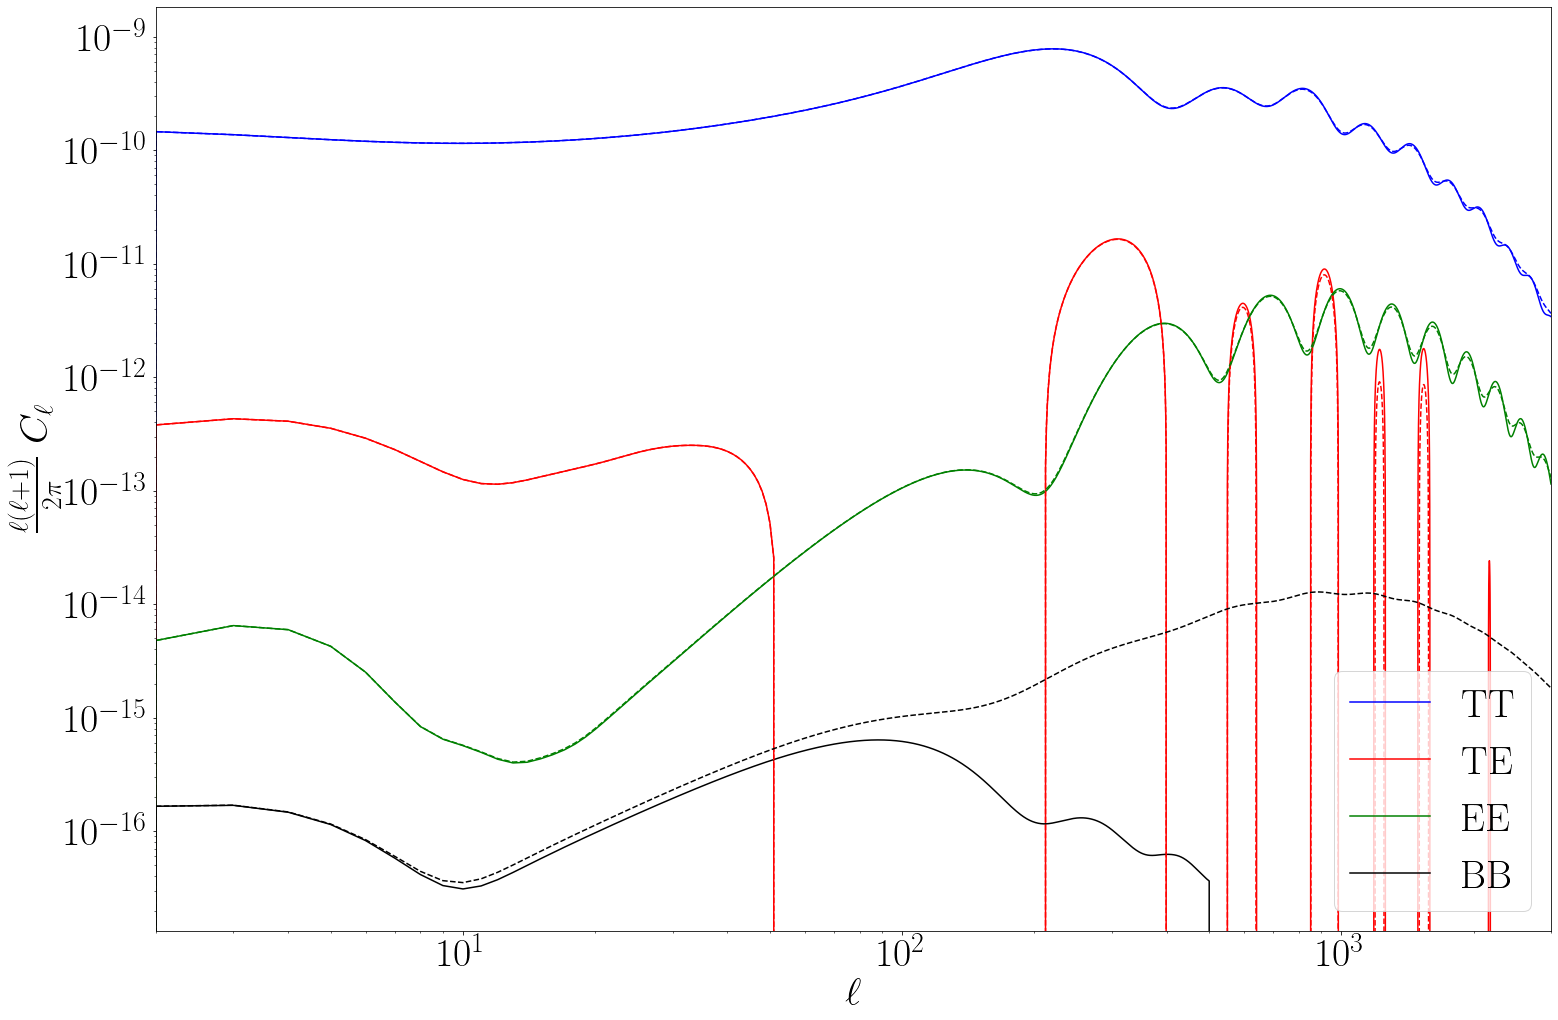

In [10]:
import matplotlib.pyplot as plt
plt.rc('text', usetex = True)
plt.rc('font', family = 'serif', size = 40)

plt.figure(figsize = (25,17))
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClTT, 'b', label = 'TT')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClTE, 'r', label = 'TE')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClEE, 'g', label = 'EE')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClBB, 'k', label = 'BB')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClTT_l, 'b--')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClTE_l, 'r--')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClEE_l, 'g--')
plt.loglog(l, l*(l+1)/(2.*np.pi)*ClBB_l, 'k--')
plt.xlim(2, l.max())
plt.xlabel('$\ell$')
plt.ylabel('$\\frac{\ell (\ell+1)}{2\pi} \ C_\ell$')
plt.legend()
plt.show()